# **Concepts Covered:**

- <a href = #link1>Binomial Distribution</a>
- <a href = #>Uniform Distribution [*additional content*]</a>
- <a href = #link3>Normal Distribution</a>





**Note** : The 'Uniform Distribution' section is available as additional content. Please refer the hands-on notebook in 'Week 1: Additional Learning Material'.

# <a name='link1'>**Binomial Distribution**</a>

## Problem statement
80% of all the visitors to Lavista Museum end up buying souvenirs from the souvenir shop at the Museum. On the coming Sunday, if a random sample of 10 visitors is picked:

 1. Find the probability that every visitor will end up buying from the souvenir shop
 2. Find the probability that a maximum of 7 visitors will buy souvenirs from the souvenir shop

Let's check first whether we satisfy the assumptions of the binomial distribution.
*  There are only two possible outcomes (success or failure) for each trial – A visitor will buy souvenirs from the souvenir shop or not (yes or no).
* Number of trials (n) is fixed - There are 10 visitors in the sample.
* Each trial is independent of the other trials - It is reasonable to assume that the buying activity of visitors is independent.
* The probability of success (p) is the same for each trial - The probability of success for each visitor is 0.8.

### Let's import the libraries

In [ ]:
# import the important packages
import pandas as pd  # library used for data manipulation and analysis
import numpy as np  # library used for working with arrays
import matplotlib.pyplot as plt  # library for plots and visualizations
import seaborn as sns  # library for visualizations

#%matplotlib inline

import scipy.stats as stats  # this library contains a large number of probability distributions as well as a growing library of statistical functions

### Let's estimate the probability distribution of visitors

In [ ]:
# declare the sample size in variable n which represents the number of visitors selected randomly
n = 10

In [ ]:
# declare p which represents the probability of success, i.e., the probability that a visitor will end up buying a souvenir
p = 0.80

In [ ]:
# declare different possible number of visitors selected in a numpy array
k = np.arange(0,11)
k

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

The probability function of Binomial Distribution provides the probability for  x  number of successes from n trials where  p is the probability of success

>$P(X=x)= {n\choose x}p^x(1-p)^{n-x}$


Here, we know that:

* n ( number of visitors selected randomly ) = 10
* p ( probability of success i.e., the probability that a visitor will end up buying a souvenir) = 0.80
* q ( probability of failure i.e., the probability that a visitor will not end up buying a souvenir) = 1 - 0.80 = 0.20
* x ( number of successes ) = 10


We will use binom.pmf() to calculate this probability function which provides the probability for the number of visitors (out of n=10) that will end up buying souvenirs from the souvenir shop.

In [ ]:
# import the required function
from scipy.stats import binom

# use the binom.pmf() function to generate the probability distribution
binomial = binom.pmf(k=k, n=n, p=p)

NameError: name 'k' is not defined

Here, [`binom.pmf(k,n,p)`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.binom.html) is used to calculate the probability $P(X=k)$   and generate the probability distribution.

* `binom` stands for binomial discrete random variable
* `pmf` stands for probability mass function

The `binom.pmf()` function takes three parameters:

* `k`: Scalar or array of different possible number of visitors
* `n`: Sample size
* `p`: Probability of success of an event





In [ ]:
binomial

array([1.02400000e-07, 4.09600000e-06, 7.37280000e-05, 7.86432000e-04,
       5.50502400e-03, 2.64241152e-02, 8.80803840e-02, 2.01326592e-01,
       3.01989888e-01, 2.68435456e-01, 1.07374182e-01])

As you can see **binomial** is the array of probabilities for different number of successes. Let us visualize the same in the following plot.

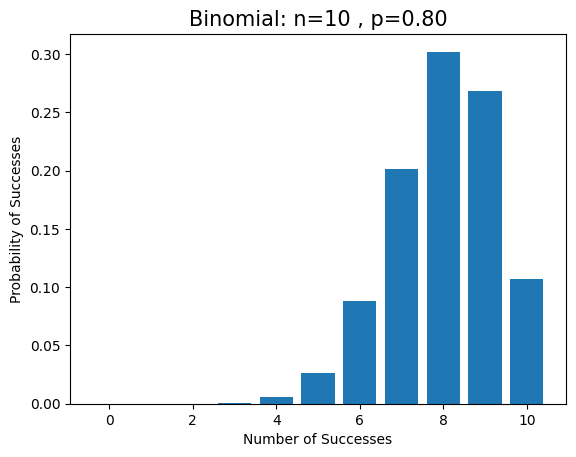

In [ ]:
# plot the distribution
plt.bar(k, binomial) # make a bar plot
plt.title("Binomial: n=%i , p=%.2f" % (n, p), fontsize=15) # set the title
plt.xlabel("Number of Successes") # set the x-axis label
plt.ylabel("Probability of Successes") # set the y-axis label
plt.show() # display the plot

The last element of this **binomial** array represents the probability when the number of successes is 10 (which means that all 10 visitors (out of 10 selected randomly) will buy souvenirs from the souvenir shop)

In [ ]:
binomial[10]

0.10737418240000006

The above probability shows that the probability of exactly 10 successes is  ~ 0.11.

Now, we are interested in knowing the probability of at most 7 successes which means what is the probability that out of 10 randomly selected visitors, a maximum of 7 visitors will buy souvenirs from the souvenir shop.

Here, we need to calculate the probability for P(X<=7). CDF is used to calculate the cumulative probability.



**CDF(Cumulative Distribution Function):** of a Random variable (X) is the probability that X  will take the value less than or equal to x. It can be represented mathematically as below.

>$F_X(x) = P(X\leq x)$

In our case, Random Variable (X) is the number of visitors who will buy souvenirs from the souvenir shop.

$P(X\leq 7)$


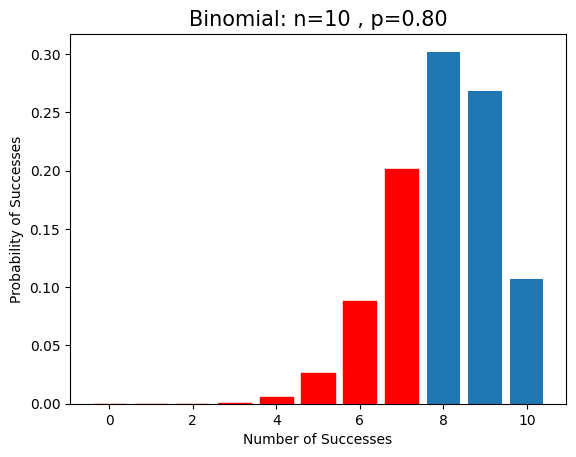

In [ ]:
# plot the probability distribution
# We are plotting the distributions here to better visualize the calculations.
# Of course you do not 'need' to create the following visualization to answer the question above.
# You can directly use the cdf function for probability calculations.
barl = plt.bar(k, binomial) # make a bar plot
plt.title("Binomial: n=%i , p=%.2f" % (n, p), fontsize=15) # set the title
plt.xlabel("Number of Successes") # set the x-axis label
plt.ylabel("Probability of Successes") # set the y-axis label
for i in range(0, 8):
    barl[i].set_color("r") # color the bars in red where number of successes is less than 8
plt.show() # display the plot

In the above graph, the **red** region represents P(X<=7).
Let's calculate the probability that out of 10 randomly selected visitors, a maximum of 7 will buy souvenirs from the souvenir shop. We will use binom.cdf() for this.

In [ ]:
# calculate cdf ---> adding all the possibilities from 0-7
binom.cdf(k=7, n=n, p=p)

0.32220047359999987

In [ ]:
# probability of getting atleast 4 not less than that / more than equal to 4 i.e. 4 -> 10
1-binom.cdf(k=3, n=n, p=p)

0.9991356416

Here, [`binom.cdf(k,n,p)`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.binom.html) function is used to calculate the cumulative probability $P(X<=k)$

The `binom.cdf()` function also takes three parameters like `binom.pmf()`


*   `k` : Scalar or array of different possible number of visitors
*   `n` : Sample size
*   `p` : Probability of success of an event

### Conclusion:

There is a 10.74% chance that every visitor will end up buying souvenirs from the souvenir shop.

There is a 32.22% chance that a maximum of 7 visitors out of 10 will buy souvenirs from the souvenir shop.

Let's try to change the probability of success (probability that each visitor will buy souvenirs from the souvenir shop) to different values like 60%,70%,90%,95% and visualize how the shape of the distribution changes.

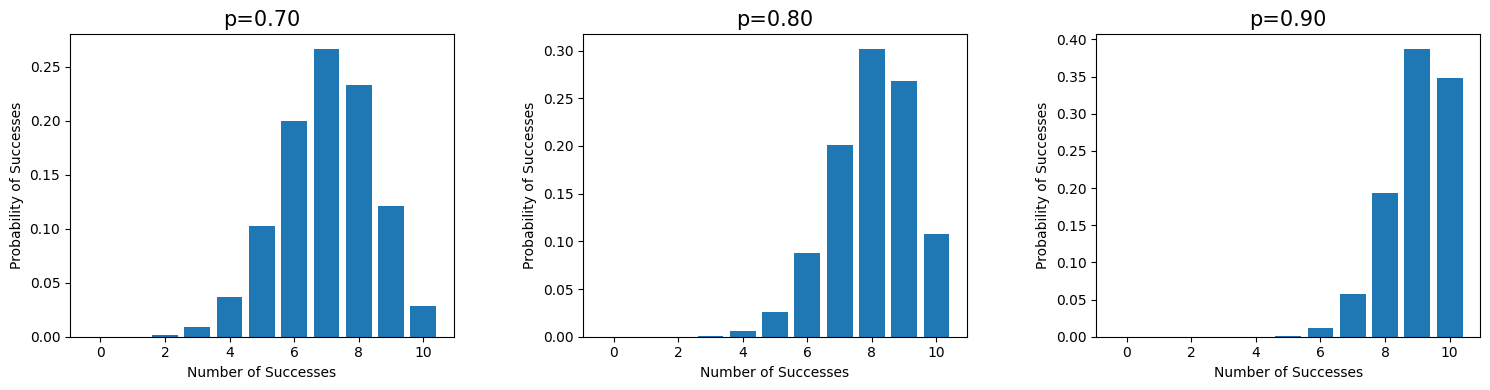

In [ ]:
plt.figure(figsize=(15, 4))

plt.subplot(131)
binomial_70 = binom.pmf(k, n, p=0.7) # generate the probability distribution

# plot the distribution of the same
plt.bar(k, binomial_70) # plot the bar plot
plt.title("p=%.2f" % (0.7), fontsize=15) # set the plot title
plt.xlabel("Number of Successes") # set the x-axis label
plt.ylabel("Probability of Successes") # set the y-axis label

plt.subplot(132) # add an axes to the current figure
binomial_80 = binom.pmf(k, n, p=0.8) # generate the probability distribution

# plot the distribution of the same
plt.bar(k, binomial_80)
plt.title("p=%.2f" % (0.8), fontsize=15)
plt.xlabel("Number of Successes")
plt.ylabel("Probability of Successes")

plt.subplot(133)
binomial_90 = binom.pmf(k, n, p=0.9)

# plot the distribution of the same
plt.bar(k, binomial_90)
plt.title("p=%.2f" % (0.9), fontsize=15)
plt.xlabel("Number of Successes")
plt.ylabel("Probability of Successes")

plt.tight_layout(w_pad=5)

### Conclusion:

It is clear from the above plot that the shape of the distribution changes as the value of p (probability of success) changes.
      
- as it goes higher the distribution shifts towards right. Obviously if our probabiity of people buying from store is 9/10 then p = 0.9 and the distribution shifted towards 9 (number of success)
```
"binomial distribution allows me getting probability on the basis of counting."
```
```
Note: - PMF is used to find absolute probabilities and CDF is used to find cumulative probabilities
```

# <a name='link3'>**Normal Distribution**</a>

- comes when the distribution is continuous ; you will see numbers is flot not int

## Problem statement

A testing agency wants to analyze the complexity of SAT Exam 2020. They have collected the SAT scores of 1000 students in "sat_score.csv". Let's answer some of the questions that will help to decide the complexity of SAT exam 2020.



1. Calculate the probability that a student will score less than 800 in SAT exam
2. Calculate the probability that a student will score more than 1300 in SAT exam
3. Calculate the minimum marks a student must score in order to secure 90th percentile
4. Calculate the minimum marks a student must score in order to be in the top 5%



### Reading the Data into the Dataframe

In [ ]:
from google.colab import drive
drive.mount('/content/drive/') #/Colab_notebooks/Python_Files
sat_score = pd.read_csv("/content/drive/MyDrive/Colab_Notebooks/Python_Files/sat_score.csv") # read the dataset
sat_score.head() # see first 5 rows of the dataset

MessageError: Error: credential propagation was unsuccessful

### Calculating the mean and standard deviation (parameters) of the SAT score



In [ ]:
# import the required function
from scipy.stats import norm

# estimate the mean and standard deviation of the SAT scores data
mu = sat_score["score"].mean()
sigma = sat_score["score"].std()
print("The estimated mean is", round(mu, 2))
print("The estimated standard deviation is", round(sigma, 2))

NameError: name 'sat_score' is not defined

### Plotting the Distribution

It  will help us analyze the shape of the data and visualize the PDF of normal distribution using the parameters (mean (mu) and Standard deviation (sigma)) from the data.

The [`norm.pdf(x, loc, scale)`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html) function will be used to calculate the probability density.

The `norm.pdf()` function takes three parameters

*   `x` : Scalar or Array of numbers
*   `loc` : Sample mean
*   `scale` : standard deviation


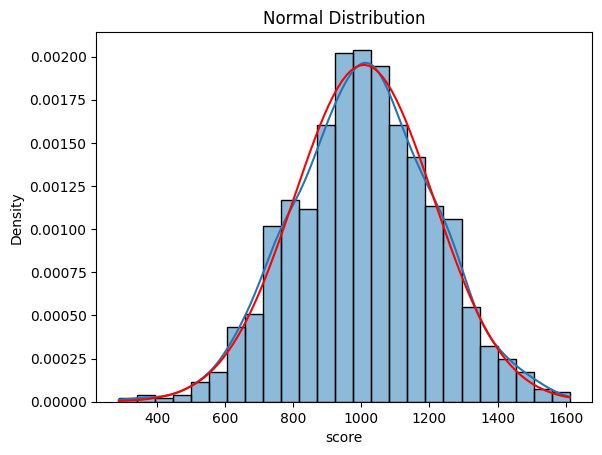

In [ ]:
# calculate the pdf of SAT scores using norm.pdf()
density = pd.DataFrame() # create an empty DataFrame
density["x"] = np.linspace(
    sat_score["score"].min()-0.01, sat_score["score"].max()+0.01, 100
) # create an array of 100 numbers in between the min and max score range and store it in the first column of the empty DataFrame


density["pdf"] = norm.pdf(density["x"], mu, sigma) # calculate the pdf() of the created numbers and store it in another column named 'pdf'

fig, ax = plt.subplots() # create the subplot
sns.histplot(sat_score["score"], ax=ax, kde=True, stat="density") # plot the distribution of data using histogram
ax.plot(density["x"], density["pdf"], color="red") # plot the pdf of the normal distribution
plt.title("Normal Distribution") # set the title
plt.show() # display the plot

**Insight:**  As you can see in the above plot, there are two curves red and blue. Blue curve represents the shape of data distribution and the red curve represents the PDF (Probability density function). This data is approximately normal. Thus, we can assume this data distribution to be normal and perform our calculations based on the normality assumption.

>$X \sim N(\mu, \sigma^2)$

**Calculate the probability that a student will score less than 800 in SAT exam.**

In [ ]:
# find the cumulative probability
# norm.cdf() calculates the cumulative probability
prob_less_than_800 = norm.cdf(800, mu, sigma)
print(
    "The probability that a student will score less than 800 is",
    round(prob_less_than_800, 4),
)

The probability that a student will score less than 800 is 0.1551


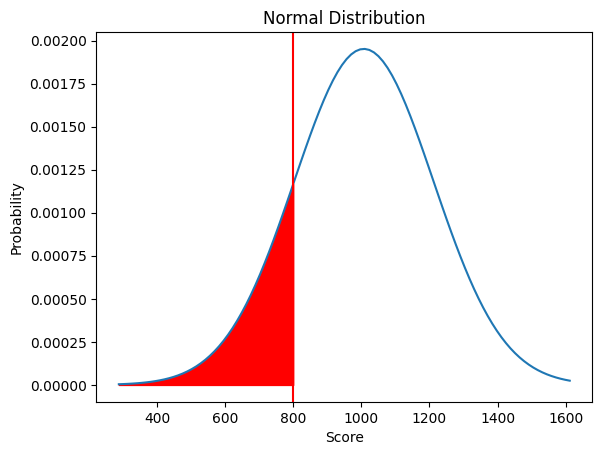

In [ ]:
# plot the probability distribution
# We are plotting the distributions here to better visualize the calculations.
# Of course you do not 'need' to create the following visualization to answer the question above.
# You can directly use the cdf function for probability calculations.

plt.plot(density["x"], density["pdf"])                       # plot the pdf of the normal distribution
plt.axvline(x=800, c="r")                                       # draw a red vertical line at x = 800
x1 = np.linspace(density["x"].min(), 800, 50)                  # create an array of 50 numbers between min SAT score and 800
plt.fill_between(x1, norm.pdf(x1, mu, sigma), color="r")       # fill the specified region with red color
plt.xlabel("Score")                                         # set the x-axis label
plt.ylabel("Probability")                                    # set the y-axis label
plt.title("Normal Distribution")                               # set the title
plt.show() # display the plot

**Calculate the probability that a student will score more than 1300 in SAT exam.**

In [ ]:
# find the cumulative probability and subtract it from 1 to calculate the probability that a student will score more than 1300
prob_greater_than_1300 = 1 - norm.cdf(1300, mu, sigma)
print(
    "The probability that a student will score more than 1300 is",
    round(prob_greater_than_1300, 4),
)

The probability that a student will score more than 1300 is 0.0762


Here, [norm.cdf(x, loc, scale))](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html) function is used to calculate the probability density.

The `norm.cdf()` function takes three parameters

*   `x` : Scalar or Array of numbers
*   `loc` : Sample mean
*   `scale` : standard deviation

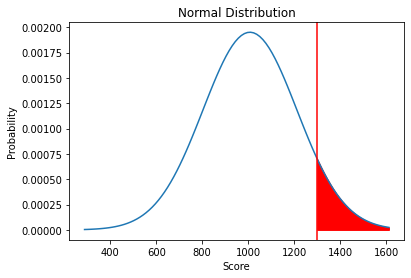

In [ ]:
# plot the probability distribution
# We are plotting the distributions here to better visualize the calculations.
# Of course you do not 'need' to create the following visualization to answer the question above.
# You can directly use the cdf function for probability calculations.
plt.plot(density["x"], density["pdf"])
plt.axvline(x=1300, c="r")
x1 = np.linspace(1300, density["x"].max(), 50)
plt.fill_between(x1, norm.pdf(x1, mu, sigma), color="r")
plt.xlabel("Score")
plt.ylabel("Probability")
plt.title("Normal Distribution")
plt.show()

In [ ]:
# find the cumulative probability and subtract it from 1 to calculate the probability that a student will score more than 750 in SAT exam 2020?
prob_greater_than_750 = 1 - norm.cdf(750, mu, sigma)
print(
    "The probability that a student will score more than 750 is",
    round(prob_greater_than_750, 4),
)

The probability that a student will score more than 750 is 0.8961


**Calculate the minimum marks a student must score in order to be in the 90th percentile**

In [ ]:
# calculate the 90th percentile score using ppf() function
#or Calculate the minimum marks a student must score in order to be in the top 10% in SAT 2020.

# norm.ppf() calculates the percentile point
score_90th_percentile = norm.ppf(0.90, mu, sigma)
print("The 90th percentile score should be", round(score_90th_percentile))

The 90th percentile score should be 1269


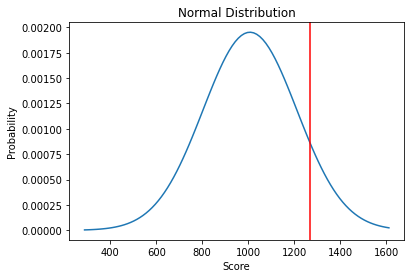

In [ ]:
# plot the probability distribution
# We are plotting the distributions here to better visualize the calculations.
# Of course you do not 'need' to create the following visualization to answer the question above.
# You can directly use the cdf function for probability calculations.
plt.plot(density["x"], density["pdf"])
plt.axvline(x=score_90th_percentile, c="r")
plt.xlabel("Score")
plt.ylabel("Probability")
plt.title("Normal Distribution")
plt.show()

**Calculate the minimum marks a student must score in order to be in the top 5%**

In [ ]:
# calculate the 95th percentile score using ppf() function
score_top_five_percent = norm.ppf(0.95, mu, sigma)
print("The minimum score to be in top 5% should be", round(score_top_five_percent))

The minimum score to be in top 5% should be 1344


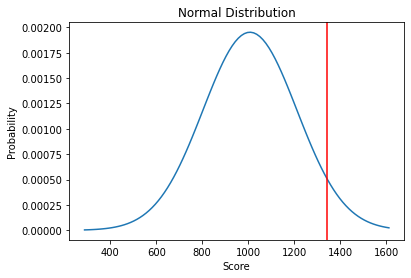

In [ ]:
# plot the probability distribution
# We are plotting the distributions here to better visualize the calculations.
# Of course you do not 'need' to create the following visualization to answer the question above.
# You can directly use the cdf function for probability calculations.
plt.plot(density["x"], density["pdf"])
plt.axvline(x=score_top_five_percent, c="r")
plt.xlabel("Score")
plt.ylabel("Probability")
plt.title("Normal Distribution")
plt.show()

**Conclusion:**

1) Only 15.51% of students will score below 800 and 7.62% of students will score above 1300. It shows that the 2020 SAT exam's complexity is moderate.

2) Students should score at least 1269 to secure the 90th percentile.

3) Students should score at least 1344 to be in the top 5%.

### Standardization of Normal Variables

Suppose we know that the SAT scores are normally distributed with mean 1000 and standard deviation 200 and ACT scores are normally distributed with mean 20 and standard deviation 5.

A college provides admission only on the basis of SAT and ACT scores. The college admin decides to give the top performer fellowship to the student who has performed the best among all applicants. The highest score received from applicants who appeared for SAT is 1350 and the highest score received from applicants who appeared for ACT is 30.

Help the college to choose the best candidate for the fellowship!

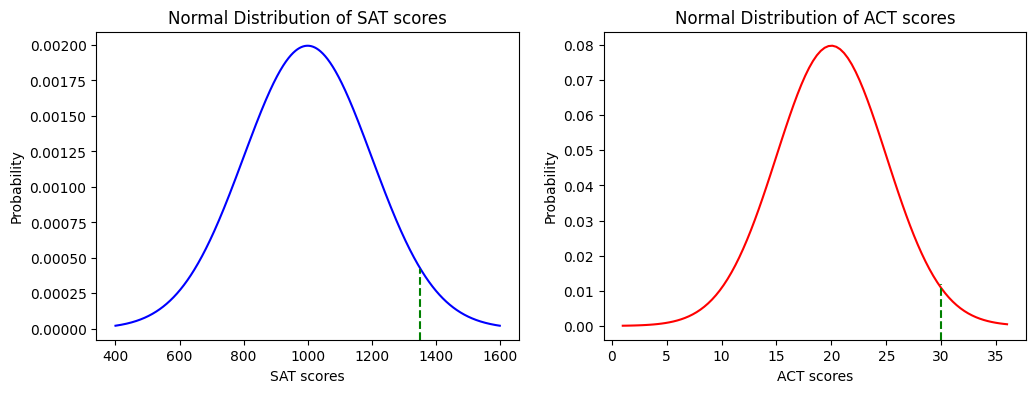

In [ ]:
# plot the two distribution for SAT and ACT scores
from scipy.stats import norm
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (12,4)) # set the axes of various plots to draw multiple plots in the same figure

# we will first create the distribution plot for SAT scores
x = np.linspace(400, 1600, 1000) ## here 400 is lower limit of bell shape curve, 1600 is upper limit, 1000 is mean
'''
Here, we are creating an array of numbers spaced evenly within the interval specified.
As the mean is 1000 and standard deviation (std) 200, the array of numbers
are evenly spaced between 400 and 1600 (mean - 3*std and mean + 3*std).
This array will be used as the x-axis of the plot.
'''
ax1.plot(x, norm.pdf(x, loc = 1000, scale = 200), color = 'b') # loc is mean/mu, scale is standerd deviation/sigma
'''
plot the probability density function
loc keyword specifies the mean
scale keyword specifies the standard deviation
'''
ax1.set_title('Normal Distribution of SAT scores') # set the title of the plot
ax1.set_xlabel('SAT scores') # set the label for x-axis
ax1.set_ylabel('Probability') # set the label for y-axis
ax1.axvline(1350, ymax = 0.23, linestyle = '--', color = 'green') # add a vertical line having green color across the axes to mark the point 1350

# we will now create a similar plot as above for the ACT scores
x1 = np.linspace(1, 36, 100)
ax2.plot(x1, norm.pdf(x1, loc = 20, scale = 5), color = 'r')
ax2.set_title('Normal Distribution of ACT scores')
ax2.set_xlabel('ACT scores')
ax2.set_ylabel('Probability')
ax2.axvline(30, ymax = 0.18, linestyle = '--', color = 'green')
plt.show()

In the above plot, the blue curve represents the distribution of SAT scores and the red curve represents the distribution of ACT scores. The highest scores of the applicants in SAT and ACT exams are dotted with green lines in the respective distributions. However, it is difficult for us to compare the raw highest scores in the above plot. Thus, we need to standardize the two scores and compare their Z-scores.

In [ ]:
# find the Z-score of highest scorer in SAT among all the applicants Z=(X-mu)/sigma
top_sat = (1350 - 1000) / 200
print('The Z-score of highest scorer in SAT among all the applicants', top_sat)
# find the Z-score of highest scorer in ACT among all the applicants
top_act = (30 - 20) / 5
print('The Z-score of highest scorer in ACT among all the applicants', top_act)

The Z-score of highest scorer in SAT among all the applicants 1.75
The Z-score of highest scorer in ACT among all the applicants 2.0


Let's plot the standard normal distribution and visualize the above standardized scores.

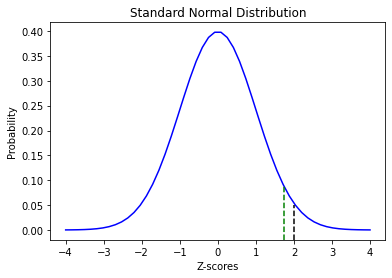

In [ ]:
# plot the standard normal distribution
# and visualize the standardized scores
# We are plotting the distributions here to better visualize the calculations.
fig, ax = plt.subplots()
x = np.linspace(-4,4,50)
ax.plot(x, norm.pdf(x, loc = 0, scale = 1), color = 'b')
ax.set_title('Standard Normal Distribution')
ax.set_xlabel('Z-scores')
ax.set_ylabel('Probability')
ax.axvline(top_sat, ymax = 0.25, linestyle = '--', color = 'green')
ax.axvline(top_act, ymax = 0.16, linestyle = '--', color = 'black')
plt.show()

In the above plot, the green line represents the standardized highest SAT score of the applicants which is 1.75 standard deviations above the mean and the black line represents the standardized highest ACT score of the applicants which is 2 standard deviations above the mean.

This means that among the applicants, the highest scorer in ACT performed better than the highest scorer in SAT.

Thus, the top performer fellowship should be given to the applicant who has scored highest in ACT.

**QSN**

A student wants to decide which subject he has performed best in the class between three subjects - Physics, History, and Computer Science. The scores in the three subjects are given below
```
Subject	  Marks Scored	Out of	Mean	Standard deviation
Physics	  60	          80	    47.5	12.3
History	  85	          100	    77	  7.1
Computer science	40	   50	    33	  7.3
```
Assuming that the scores for each subject are normally distributed, compare the scores to determine in which subject has the student scored the best in the class.

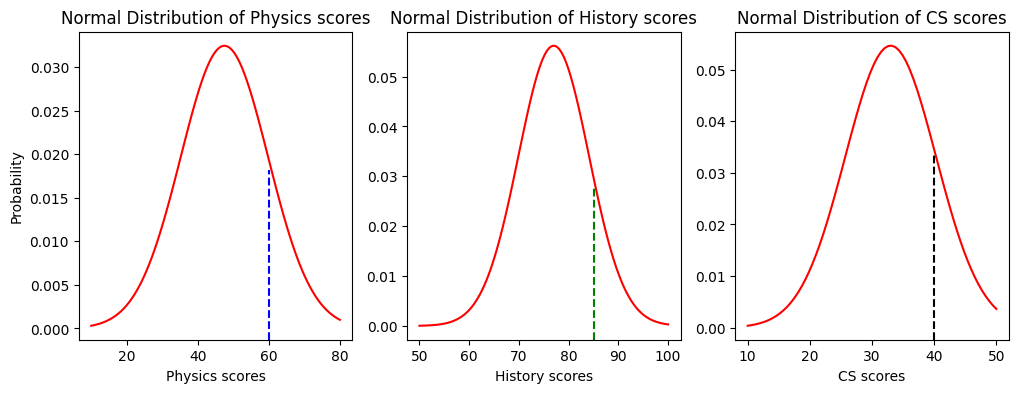

In [ ]:
# plot the two distribution for Physics, History ,and Comp Science(CS) scores
from scipy.stats import norm
fig, (px1, hx2,cx3) = plt.subplots(1,3,figsize = (12,4)) # set the axes of various plots to draw multiple plots in the same figure

# we will first create the distribution plot for Physics scores
Px = np.linspace(10, 80, 100)
'''
Here, we are creating an array of numbers spaced evenly within the interval specified.
As the mean is 1000 and standard deviation (std) 200, the array of numbers
are evenly spaced between 400 and 1600 (mean - 3*std and mean + 3*std).
This array will be used as the x-axis of the plot.
'''
px1.plot(Px, norm.pdf(Px, loc = 47.5, scale = 12.3), color = 'r')
'''
plot the probability density function
loc keyword specifies the mean
scale keyword specifies the standard deviation
'''
px1.set_title('Normal Distribution of Physics scores') # set the title of the plot
px1.set_xlabel('Physics scores') # set the label for x-axis
px1.set_ylabel('Probability') # set the label for y-axis
px1.axvline(60, ymax = 0.55, linestyle = '--', color = 'blue') # add a vertical line having green color across the axes to mark the point 1350

# we will now create a similar plot as above for the History scores
Hx = np.linspace(50, 100, 120)
hx2.plot(Hx, norm.pdf(Hx, loc = 77, scale = 7.1), color = 'r')
hx2.set_title('Normal Distribution of History scores')
hx2.set_xlabel('History scores')
#hx2.set_ylabel('Probability')
hx2.axvline(85, ymax = 0.50, linestyle = '--', color = 'green')


# we will now create a similar plot as above for the Comuter Scrience
Cx = np.linspace(10, 50, 70)
cx3.plot(Cx, norm.pdf(Cx, loc = 33, scale = 7.3), color = 'r')
cx3.set_title('Normal Distribution of CS scores')
cx3.set_xlabel('CS scores')
#cx3.set_ylabel('Probability')
cx3.axvline(40, ymax = 0.60, linestyle = '--', color = 'black')
plt.show()


In [ ]:
# find the Z-score of highest scorer in Physics among all the applicants Z=(X-mu)/sigma
top_physics = (60 - 47.5) / 12.3
print('The Z-score of highest scorer in Physics among all the applicants', top_physics)
# find the Z-score of highest scorer in History among all the applicants
top_history = (85 - 77) / 7.1
print('The Z-score of highest scorer in History among all the applicants', top_history)
# find the Z-score of highest scorer in CS among all the applicants
top_CS = (40 - 33) / 7.3
print('The Z-score of highest scorer in CS among all the applicants', top_CS)

The Z-score of highest scorer in Physics among all the applicants 1.0162601626016259
The Z-score of highest scorer in History among all the applicants 1.1267605633802817
The Z-score of highest scorer in CS among all the applicants 0.9589041095890412


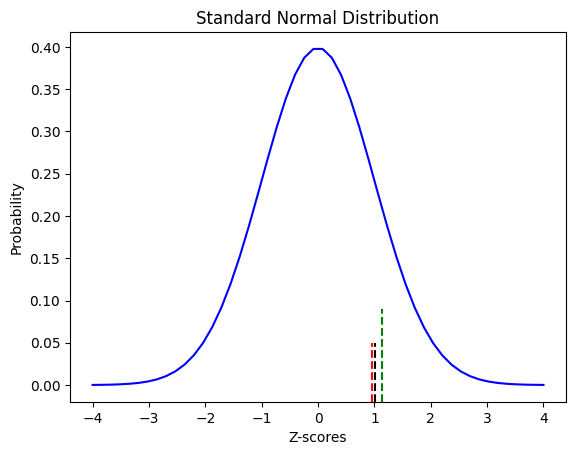

In [ ]:
# plot the standard normal distribution
# and visualize the standardized scores
# We are plotting the distributions here to better visualize the calculations.
fig, ax = plt.subplots()
x = np.linspace(-4,4,50)
ax.plot(x, norm.pdf(x, loc = 0, scale = 1), color = 'b')
ax.set_title('Standard Normal Distribution')
ax.set_xlabel('Z-scores')
ax.set_ylabel('Probability')
ax.axvline(top_history, ymax = 0.25, linestyle = '--', color = 'green')
ax.axvline(top_physics, ymax = 0.16, linestyle = '--', color = 'black')
ax.axvline(top_CS, ymax = 0.16, linestyle = '--', color = 'red')
plt.show()

- so History is in the top

In [ ]:
# Salaries of employees in a company are normally distributed with a mean of $55000 with a standard deviation of $6200. What percentage of employees earn approximately between $59000 and $67000?
prob_less_than_59000 = norm.cdf(59000, 55000, 6200)
prob_less_than_67000 =  norm.cdf(67000, 55000, 6200)
prob_between_59000_and_67000= prob_less_than_67000 - prob_less_than_59000
print(
    "The percentage of employees earn approximately between $59000 and $67000 is ",
    round(prob_between_59000_and_67000, 4),
)

The percentage of employees earn approximately between $59000 and $67000 is  0.2329


In [ ]:
#A college conducts a common test for all the students. For the Mathematics portion of this test, the scores are normally distributed with a mean
# of 502 and a standard deviation of 115. Based on this information, what percentage of students would be expected to score between 400 and 590?

prob_less_than_400 = norm.cdf(400, 502, 115)
prob_less_than_590 =  norm.cdf(590, 502, 115)
prob_between_400_and_590=   prob_less_than_590 - prob_less_than_400
print(
    "percentage of students would be expected to score between 400 and 590 is ",
    round(prob_between_400_and_590, 4),
)

percentage of students would be expected to score between 400 and 590 is  0.5904


In [ ]:
# A student is taking a multiple-choice exam that has 7 test questions and each has 4 options. Assume that the student has no knowledge of
#the subject material but guesses the correct answer with a probability of 0.75. What is the probability that she will answer at most 3 questions correctly?
binomial = binom.cdf(k=3, n=7, p=0.75)
binomial

0.070556640625

**difference between cdf, pdf, pmf , ppf when we use what?**

1. **CDF (Cumulative Distribution Function)**:
   - **Definition**: The CDF of a random variable \( X \) at a value \( x \) is the probability that \( X \) will take a value less than or equal to \( x \). It is denoted as \( F(x) = P(X \leq x) \).
   - **When to use**: Use the CDF when you want to find the probability that a random variable falls within a certain range up to a specified value.
   - **Example**: `norm.cdf(x, mean, std_dev)` in `scipy.stats` for a normal distribution.

2. **PDF (Probability Density Function)**:
   - **Definition**: The PDF of a continuous random variable is a function that describes the likelihood of a random variable to take on a particular value. It is denoted as \( f(x) \). The value of the PDF at any point gives the relative likelihood of the random variable being near that point.
   - **When to use**: Use the PDF when you want to know the density or relative likelihood of a continuous random variable taking a specific value.
   - **Example**: `norm.pdf(x, mean, std_dev)` in `scipy.stats` for a normal distribution.

3. **PMF (Probability Mass Function)**:
   - **Definition**: The PMF is the equivalent of the PDF for discrete random variables. It gives the probability that a discrete random variable is exactly equal to some value.
   - **When to use**: Use the PMF when dealing with discrete random variables and you want to find the probability of a **specific outcome.** *When you know the outcome (you know 5 out of 20 is earning `$20M`) and want to find the probability.*
   - **Example**: `binom.pmf(k, n, p)` in `scipy.stats` for a binomial distribution.

4. **PPF (Percent Point Function or Inverse CDF)**: if I get percentile use ppf to get x
   - **Definition**: The PPF is the inverse of the CDF. For a given probability \( p \), it returns the value \( x \) such that \( F(x) = p \). Essentially, it answers the question: "For a given cumulative probability, what is the corresponding value of the random variable?"
   - **When to use**: Use the PPF when you have a probability and you want to find the corresponding value of the random variable.
   - **Example**: `norm.ppf(p, mean, std_dev)` in `scipy.stats` for a normal distribution.

### Examples of Usage

1. **CDF Example**:
   - **Question**: What is the probability that a man is shorter than 63 inches if heights are normally distributed with a mean of 65.6 inches and a standard deviation of 2.7 inches?
   - **Code**:
     ```python
     from scipy.stats import norm
     probability = norm.cdf(63, 65.6, 2.7)
     ```

2. **PDF Example**:
   - **Question**: What is the density of heights at 63 inches for men?
   - **Code**:
     ```python
     from scipy.stats import norm
     density = norm.pdf(63, 65.6, 2.7)
     ```

3. **PMF Example**:
   - **Question**: What is the probability that exactly 5 out of 20 randomly chosen employees earn more than `$2M` if the probability of any employee earning more than `$2M` is 0.12?
   - **Code**:
     ```python
     from scipy.stats import binom
     probability = binom.pmf(5, 20, 0.12)
     ```

4. **PPF Example**:
   - **Question**: What height corresponds to the 90th percentile of men's heights?
   - **Code**:
     ```python
     from scipy.stats import norm
     height = norm.ppf(0.90, 65.6, 2.7)
     ```

These functions are essential tools in probability and statistics for analyzing and interpreting different types of data distributions.

#Uniform Distribution

In [ ]:
# import the important packages
import pandas as pd # Library used for data manipulation and analysis
import numpy as np # Library used for working with arrays.
import matplotlib.pyplot as plt # Library for plots and visualisations
import seaborn as sns # Library for visualisations

%matplotlib inline I

import scipy.stats as stats # this Library contains a large number of probability distributions as wel

UsageError: unrecognized arguments: I


**Discrete Uniform Distribution**

**Problem statement**

Number of books sold by a bookseller per day is given in 'bookseller.csv'.

Let

X = Number of books sold by a bookseller per day

X is a Discrete Random variable (because it represent the books count). Let's see the distribution of X and answer the below
questions.

1. Find the probability that more than (or equal to) 96 books will be sold on a given day
2. Find the probability that less than (or equal to) 92 books will be sold on a given day

In [ ]:
#Reading the Data into the Dataframe
from google.colab import drive
drive.mount('/content/drive/') #/Colab_notebooks/Python_Files
book_count = pd.read_excel("/content/drive/MyDrive/Colab_Notebooks/Python_Files/bookseller.xlsx")
book_count.head()

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


,S.No,Date,Number of Books Sold
0,1,2020-01-01 00:00:00,90
1,2,2020-02-01 00:00:00,100
2,3,2020-03-01 00:00:00,100
3,4,2020-04-01 00:00:00,97
4,5,2020-05-01 00:00:00,93


- Let's plot the histogram of data along with the PDF of uniform distribution using the parameters minimum book sold and
maximum book sold in a day.

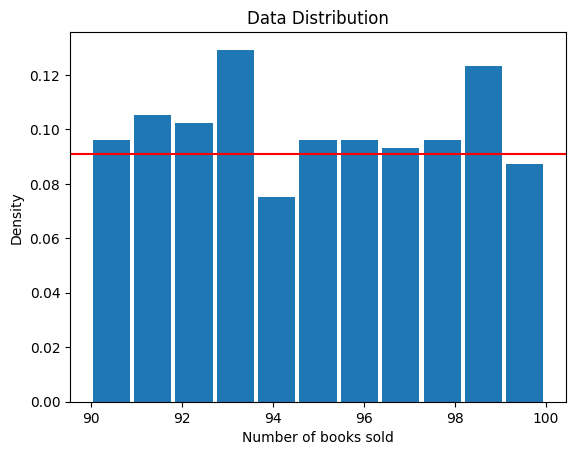

In [ ]:
# visualize the distribution of number of books sold
plt.hist(book_count["Number of Books Sold"], 11, rwidth=0.9, density=True) #rwidth is width of bars 0.9 will give you some gap (0.1) between 2 bars
plt.axhline(1 / 11, color="red") #horizontal line
plt.xlabel("Number of books sold")
plt.ylabel("Density")
plt.title("Data Distribution")
plt.show()

Insight: As you can see from the above plot that all the values between 90 and 100 are having almost equal probability, you
can assume that the number of books sold follow discrete uniform distribution.

X~ U(90,100)

In [ ]:
# import the required function
from scipy.stats import uniform

# use the uniform.pmf() function to generate the probability distribution
k = np.arange(90, 101)
probs = uniform.pdf(k, loc=90, scale=11) ## 90 to 100 total 11 numbers

Find the probability that more than 96 books will be sold on a given day

**P(X ≥96)**

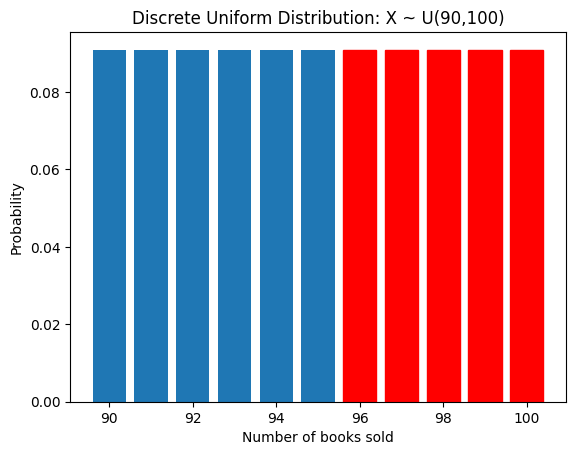

In [ ]:
# plot the probability distribution
# We are plotting the distributions here to better visualize the calculations.
# Of course you do not 'need' to create the following visualization to answer the question above.
# You can directly use the cdf function for probability calculations.

barl = plt.bar(k, probs)

for i in range(6, 11):
  barl[i].set_color("r")
plt.xlabel("Number of books sold")
plt.ylabel("Probability")
plt.title("Discrete Uniform Distribution: X ~ U(90,100)")
plt.show()

In the above graph, red region represent P(X>=96). Let's calculate the probability that more than 96 books will be sold on a
given day. We will use uniform.cdf() for this.

In [ ]:
1 - uniform.cdf(96, loc=90, scale=11)

0.4545454545454546

Find the probability that less than 92 books will be sold on a given day

**P(X ≤92)**

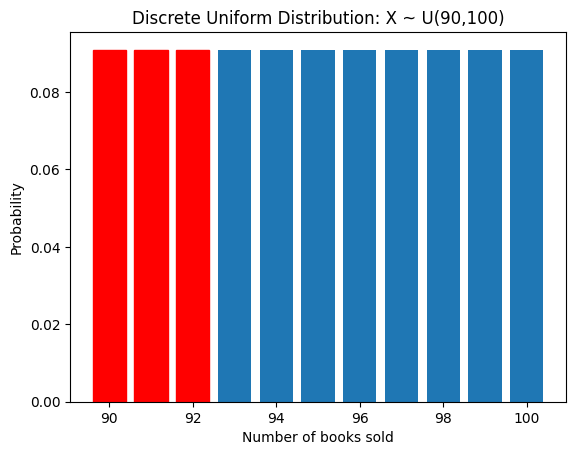

In [ ]:
# plot the probability distribution
# We are plotting the distributions here to better visualize the calculations.
# Of course you do not 'need' to create the following visualization to answer the question above.
# You can directly use the cdf function for probability calculations.
barl = plt.bar(k, probs)

for i in range(0, 3):
  barl[i].set_color("r")
plt.xlabel("Number of books sold")
plt.ylabel("Probability")
plt.title("Discrete Uniform Distribution: X ~ U(90,100)")
plt.show()

In the above graph, red region represent P(X <= 92). Let's calculate the probability that less than 92 books will be sold on a
given day. We will use uniform.cdf() for this.

In [ ]:
uniform.cdf(93, loc=90, scale=11)

0.2727272727272727

**Conclusion:**

There is 45.45% chance that more than 96 books will be sold on a given day.

There is 27.27% chance that less than 92 books will be sold on a given day.

# Continuous Distribution
Problem statement

IT industry records the amount of time a software engineer needs to fix a bug in the initial phase of software development in
'debugging.csv'.

Let

X = Time needed to fix bugs

X is a continuous random variable. Let's see the distribution of X and answer the below questions.

1. Find the probability that a randomly selected software debugging requires less than three hours
2. Find the probability that a randomly selected software debugging requires more than two hours
3. Find the 50th percentile of the software debugging time

In [ ]:
debugging = pd.read_excel("/content/drive/MyDrive/Colab_Notebooks/Python_Files/debugging.xlsx")
debugging.head()

,Bug ID,Time Taken to fix the bug
0,12986,2.42
1,12987,2.03
2,12988,2.74
3,12989,3.21
4,12990,3.40


Let's plot the histogram of data along with the PDF of uniform distribution using the parameters minimum time required and
maximum time required for bug fixing.

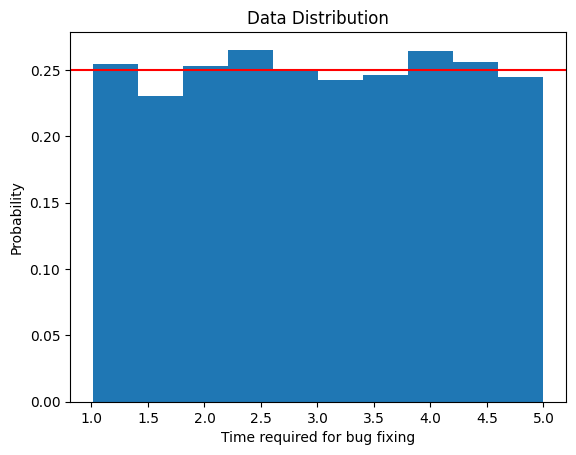

In [ ]:
# visualize the distribution of the time needed for bug fixing
plt.hist(debugging["Time Taken to fix the bug"],density=True) # rwidth=0.9 you can use to make the distribution easy to visualize
plt.axhline(1 / 4, color="red")
plt.xlabel("Time required for bug fixing")
plt.ylabel("Probability")
plt.title("Data Distribution")
plt.show()

Another way to recognize a uniform distribution in your data is to look at a density plot. We will use distplot of seaborn library
to visualize the distribution of time needed for bug fixing.

<ipython-input-31-438c0951a142>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns. distplot(debugging["Time Taken to fix the bug"])


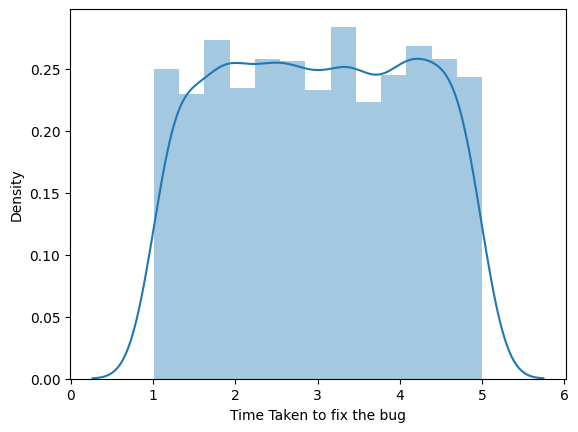

In [ ]:
# Density plot of time taken to fix the bug
sns. distplot(debugging["Time Taken to fix the bug"])
plt. show()

Insight: As you can see from the above plot that all the values between 1 and 5 are having almost cqual probability, we are
going to use continuous uniform distribution. We need to decide the endpoints. Here, endpoints are 1 and 5.

X~U(1,5)

In [ ]:
# import the required function
from scipy.stats import uniform

# use the uniform.pmf() function to generate the probability distribution
x = np.linspace(1, 5, 50)
probs = uniform.pdf(x, loc=1, scale=4) # starts at 1 and ends at 5 ; so 4 steps after 1

**Find the probability that a randomly selected software debugging requires a maximum time of 3 hours**

**CDF:** of a random variable(X) is the probability that X will take the value less than or equal to x. It can be represented
mathematically as below.

```
Fx(x)= P(X ≤ x)
```
In our case, random variable(X) is the number of hours.

P(X≤3)

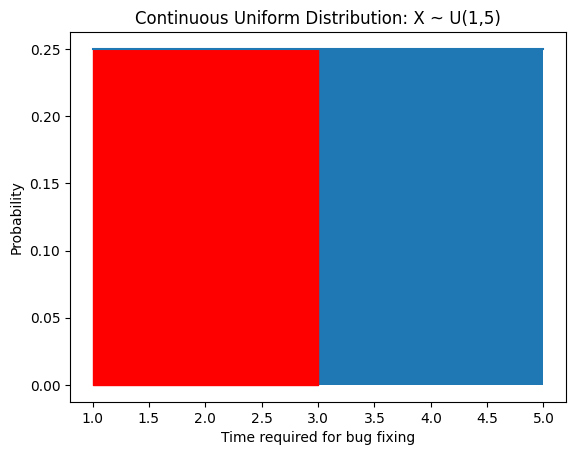

In [ ]:
# plot the probability distribution
# We are plotting the distributions here to better visualize the calculations.
# Of course you do not 'need' to create the following visualization to answer the question above.
# You can directly use the cdf function for probability calculations.
x1=np.linspace(1, 3, 25)
plt.plot(x, probs)
plt.fill_between(x, probs)
plt.fill_between(x1, uniform.pdf(x=x1, loc=1, scale=4), color="r")
plt.xlabel("Time required for bug fixing")
plt.ylabel("Probability")
plt.title("Continuous Uniform Distribution: X ~ U(1,5)")
plt.show()

In the above graph, red region represent P(X <= 3). Let's calculate the probability that that a randomly selected software
debugging requires a maximum time of 3 hours . We will use uniform.cdf() for this.

In [ ]:
uniform.cdf(x=3, loc=1, scale=4)

0.5

Find the probability that a randomly selected software bug fixing requires more than two hours.

P(X>2)

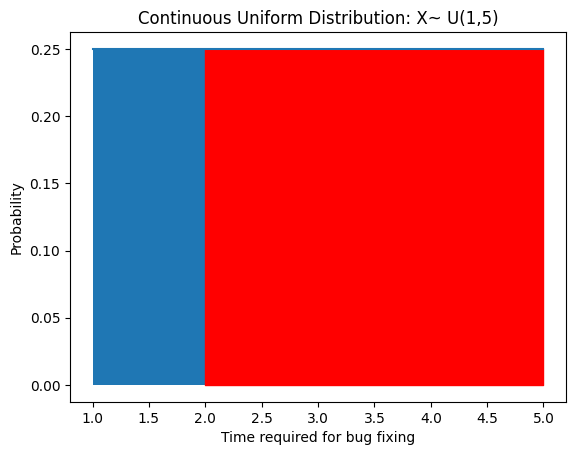

In [ ]:
# plot the probability distribution
# We are plotting the distributions here to better visualize the calculations.
# Of course you do not 'need' to create the following visualization to answer the question above.
# You can directly use the cdf function for probability calculations.
x1 = np.linspace(2, 5, 20)
plt.plot(x, probs)
plt.fill_between(x, probs)
plt.fill_between(x1, uniform.pdf(x=x1, loc=1, scale=4), color="r")
plt.xlabel("Time required for bug fixing")
plt.ylabel("Probability")
plt.title("Continuous Uniform Distribution: X~ U(1,5)")
plt.show()

In the above graph, orange region represent P(X>2). Let's calculate the probability that that that a randomly selected software
debugoing requires more than two hours. We will use uniform.cdf() for this.

In [ ]:
1 - uniform.cdf(x=2, loc=1, scale=4)

0.75

**Let's calculate the 50th percentile of software debugging time.**

ppf(): It is used to calculate the percentile point given probability. It works opposite of cdf()

In [ ]:
uniform.ppf(q=0.5, loc=1, scale=4) # inverse of CDF

3.0

***Conclusion:***

There is a 50% chance that a randomly selected software debugging requires less than three hours.

There is an 75% chance that a randomly selected software debugging requires more than two hours.

The 50th percentile of the software debugging time is 3 hours.

In [ ]:
1 - uniform.cdf(x=4.2, loc=1, scale=4)

0.19999999999999996